In [4]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [105]:
df= yf.download('ETH-USD', start= '2019-01-01')

[*********************100%***********************]  1 of 1 completed


In [106]:
df['SMA'] = df.Close.rolling(window=20).mean()

In [107]:
df['stddev'] = df.Close.rolling(window=20).std()

In [108]:
df['Upper'] = df.SMA + 2*df.stddev
df['Lower'] =df.SMA - 2*df.stddev 

In [109]:
df['Buy_Signal'] = np.where(df.Lower > df.Close, True, False)


In [110]:
df['Sell_Signal'] = np.where(df.Upper <df.Close, True, False)

In [111]:
df = df.dropna()

In [112]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA,stddev,Upper,Lower,Buy_Signal,Sell_Signal
Date,,,,,,,,,,,,
2019-01-20,124.632401,125.070389,118.702324,119.474831,119.474831,2964108269,136.413160,14.868274,166.149707,106.676612,False,False
2019-01-21,119.636459,119.715439,116.157440,117.157852,117.157852,2421720343,135.230082,15.429984,166.090050,104.370113,False,False
2019-01-22,117.110756,119.664345,114.676682,118.747551,118.747551,2552507405,133.415075,15.107780,163.630635,103.199514,False,False
2019-01-23,118.713814,119.422798,116.376648,117.452606,117.452606,2556952198,131.830955,15.033560,161.898075,101.763834,False,False
2019-01-24,117.462784,118.032104,116.006798,117.362885,117.362885,2520843420,129.970002,14.357477,158.684955,101.255049,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-05,3794.269043,3842.059814,3456.745361,3550.386963,3550.386963,18061338502,3879.214709,163.483993,4206.182694,3552.246724,True,False
2022-01-06,3549.708984,3549.708984,3335.376709,3418.408203,3418.408203,24293791313,3856.160791,193.244623,4242.650036,3469.671546,True,False
2022-01-07,3417.837891,3420.461914,3117.381348,3193.210449,3193.210449,24494179209,3817.778308,241.552338,4300.882984,3334.673632,True,False


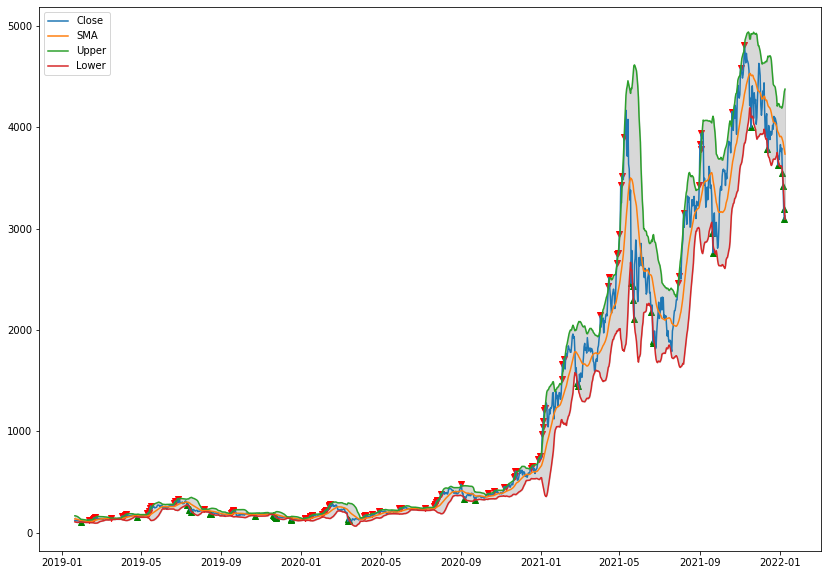

In [113]:
plt.figure(figsize=(14,10))
plt.plot(df[['Close','SMA','Upper','Lower']])
plt.scatter(df.index[df.Buy_Signal], df[df.Buy_Signal].Close, marker='^', color='g')
plt.scatter(df.index[df.Sell_Signal], df[df.Sell_Signal].Close, marker='v', color='r')
plt.fill_between(df.index, df.Upper,df.Lower, color='grey', alpha=0.3)
plt.legend(['Close','SMA','Upper','Lower'])
plt.show()

In [114]:
buys = []
sells = []
open_pos = False

for i in range(len(df)):
  if df.Lower[i] > df.Close[i]:
    if open_pos == False:
      buys.append(i)
      open_pos = True
  elif df.Upper[i] < df.Close[i]:
    if open_pos:
      sells.append(i)
      open_pos = False
      

In [115]:
buys

[9, 95, 172, 206, 276, 417, 594, 767, 850, 974, 1033]

In [116]:
sells

[21, 111, 197, 239, 351, 442, 631, 803, 922, 1004]

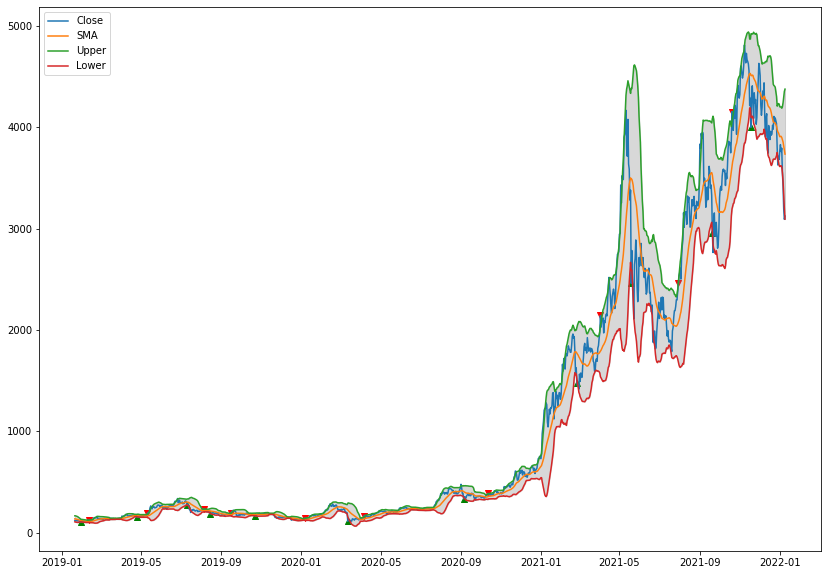

In [117]:
plt.figure(figsize=(14,10))
plt.plot(df[['Close','SMA','Upper','Lower']])
plt.scatter(df.iloc[buys].index, df.iloc[buys].Close, marker='^', color='g')
plt.scatter(df.iloc[sells].index, df.iloc[sells].Close, marker='v', color='r')
plt.fill_between(df.index, df.Upper,df.Lower, color='grey', alpha=0.3)
plt.legend(['Close','SMA','Upper','Lower'])
plt.show()

In [118]:
#BackTesting


In [119]:
merged = pd.concat([df.iloc[buys].Close, df.iloc[sells].Close], axis=1)

In [120]:
merged

,Close,Close
Date,,
2019-01-29,105.598213,NaN
2019-02-10,NaN,124.806488
2019-04-25,154.459396,NaN
2019-05-11,NaN,194.304337
2019-07-11,268.704041,NaN
2019-08-05,NaN,234.215027
2019-08-14,186.607742,NaN
2019-09-16,NaN,197.113174
2019-10-23,162.402786,NaN


In [121]:
merged.columns = ['Buys','Sells']

In [122]:
merged

,Buys,Sells
Date,,
2019-01-29,105.598213,NaN
2019-02-10,NaN,124.806488
2019-04-25,154.459396,NaN
2019-05-11,NaN,194.304337
2019-07-11,268.704041,NaN
2019-08-05,NaN,234.215027
2019-08-14,186.607742,NaN
2019-09-16,NaN,197.113174
2019-10-23,162.402786,NaN


In [123]:
totalprofit = merged.shift(-1).Sells - merged.Buys

In [124]:
relprofits = (merged.shift(-1).Sells - merged.Buys)/merged.Buys

In [125]:
relprofits.mean() * 100

17.777725379908347